In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/weather.zip","r")
zip_ref.extractall("/content/drive/MyDrive/Colab Notebooks/frame/")
zip_ref.close()

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
ROOT_DIR ="/content/drive/MyDrive/Colab Notebooks/frame/weather/data/"

In [ ]:
splitfolders.ratio(ROOT_DIR,output="splited_data",
                   seed=42,
                   ratio=(.7,.0,.3),
                   group_prefix=None)

Copying files: 813 files [00:12, 66.42 files/s]


In [ ]:
!sudo pip install git+https://www.github.com/keras-team/keras-contrib.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-wiku6cs6
  Running command git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-wiku6cs6
  Resolved https://www.github.com/keras-team/keras-contrib.git to commit 3fc5ef709e061416f4bc8a92ca3750c824b5d2b0
  Preparing metadata (setup.py) ... done
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101058 sha256=5e6fbde1b82b3545c4443681e03b4b096a829232626b2a1ed7bb93b1b4603043
  Stored in directory: /tmp/pip-ephem-wheel-cache-zbbo4gys/wheels/74/d5/f7/0245af7ac33d5b0c2e095688649916e4bf9a8d6b3362a849f5
Successfully built keras-contrib


In [ ]:
...
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
# define layer
layer = InstanceNormalization(axis=-1)
...

Ellipsis

In [ ]:
# example of preparing the horses and zebra dataset
from os import listdir
from numpy import asarray
from numpy import vstack
import matplotlib.pyplot as plt
# from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
# from keras.preprocessing.image import load_img
from tensorflow.keras.utils import load_img
from numpy import savez_compressed


# example of training a cyclegan on the Clear2Rain dataset
from keras.models import load_model
from numpy import expand_dims
from random import random
from numpy import load
from numpy import zeros
from numpy import ones
from numpy import asarray
from numpy.random import randint
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
# from keras.models import Input
from tensorflow.keras import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from matplotlib import pyplot


In [ ]:
# load all images in a directory into memory
def load_images(path, size=(256,256)):
	data_list = list()
	# enumerate filenames in directory, assume all are images
	for filename in listdir(path):
		# load and resize the image
		pixels = load_img(path + filename, target_size=size)
		# convert to numpy array
		pixels = img_to_array(pixels)
		# store
		data_list.append(pixels)
	return asarray(data_list)

# dataset path
path = '/content/splited_data/'
# load dataset A
dataA1 = load_images(path + "train/sunny/")
dataAB = load_images(path + "test/sunny/")
# dataA1 = load_images("/content/drive/MyDrive/Colab Notebooks/dataset/Image1.png")
# dataAB = load_images("/content/drive/MyDrive/Colab Notebooks/dataset/Image1.png")
dataA = vstack((dataA1, dataAB))
print('Loaded dataA: ', dataA.shape)
# load dataset B
dataB1 = load_images(path + "train/rainy/")
dataB2 = load_images(path + "test/rainy/")
# dataB1 = load_images("/content/drive/MyDrive/Colab Notebooks/dataset/Image2.png")
# dataB2 = load_images("/content/drive/MyDrive/Colab Notebooks/dataset/Image1.png")
dataB = vstack((dataB1, dataB2))
print('Loaded dataB: ', dataB.shape)
# save as compressed numpy array
filename = '/content/drive/MyDrive/Colab Notebooks/frame/weather/npzdata/Sunny2Rainy_256.npz'
savez_compressed(filename, dataA, dataB)
print('Saved dataset: ', filename)

Loaded:  (520, 256, 256, 3) (293, 256, 256, 3)


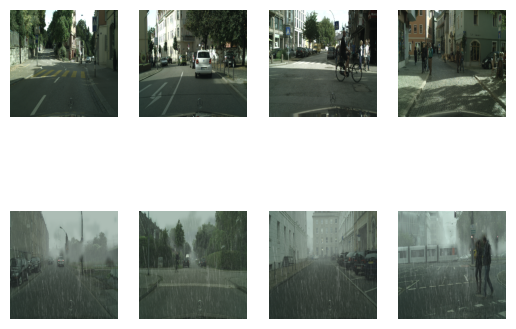

In [ ]:
# load and plot the prepared dataset
from numpy import load
from matplotlib import pyplot
# load the dataset
data = load('/content/drive/MyDrive/Colab Notebooks/frame/weather/npzdata/Sunny2Rainy_256.npz')
dataA, dataB = data['arr_0'], data['arr_1']
print('Loaded: ', dataA.shape, dataB.shape)
# plot source images
n_samples = 4
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(dataA[i].astype('uint8'))
# plot target image
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + n_samples + i)
	pyplot.axis('off')
	pyplot.imshow(dataB[i].astype('uint8'))
pyplot.show()

In [ ]:
# define the discriminator model
def define_discriminator(image_shape):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# source image input
	in_image = Input(shape=image_shape)
	# C64
	d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(in_image)
	d = LeakyReLU(alpha=0.2)(d)
	# C128
	d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C256
	d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C512
	d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# second last output layer
	d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# patch output
	patch_out = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
	# define model
	model = Model(in_image, patch_out)
	# compile model
	model.compile(loss='mse', optimizer=Adam(lr=0.0002, beta_1=0.5), loss_weights=[0.5])
	return model

In [ ]:
# generator a resnet block
def resnet_block(n_filters, input_layer):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# first layer convolutional layer
	g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(input_layer)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# second convolutional layer
	g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)

	# concatenate merge channel-wise with input layer
	g = Concatenate()([g, input_layer])
	return g

In [ ]:
# define the standalone generator model
def define_generator(image_shape, n_resnet=9):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# c7s1-64
	g = Conv2D(64, (7,7), padding='same', kernel_initializer=init)(in_image)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# d128
	g = Conv2D(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# d256
	g = Conv2D(256, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# R256
	for _ in range(n_resnet):
		g = resnet_block(256, g)
	# u128
	g = Conv2DTranspose(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# u64
	g = Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# c7s1-3
	g = Conv2D(3, (7,7), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	out_image = Activation('tanh')(g)
	# define model
	model = Model(in_image, out_image)
	return model

In [ ]:
# define a composite model for updating generators by adversarial and cycle loss
def define_composite_model(g_model_1, d_model, g_model_2, image_shape):
	# ensure the model we're updating is trainable
	g_model_1.trainable = True
	# mark discriminator as not trainable
	d_model.trainable = False
	# mark other generator model as not trainable
	g_model_2.trainable = False
	# discriminator element
	input_gen = Input(shape=image_shape)
	gen1_out = g_model_1(input_gen)
	output_d = d_model(gen1_out)
	# identity element
	input_id = Input(shape=image_shape)
	output_id = g_model_1(input_id)
	# forward cycle
	output_f = g_model_2(gen1_out)
	# backward cycle
	gen2_out = g_model_2(input_id)
	output_b = g_model_1(gen2_out)
	# define model graph
	model = Model([input_gen, input_id], [output_d, output_id, output_f, output_b])
	# define optimization algorithm configuration
	opt = Adam(lr=0.0002, beta_1=0.5)
	# compile model with weighting of least squares loss and L1 loss
	model.compile(loss=['mse', 'mae', 'mae', 'mae'], loss_weights=[1, 5, 10, 10], optimizer=opt)
	return model

In [ ]:
# load and prepare training images
def load_real_samples(filename):
	# load the dataset
	data = load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

In [ ]:
# select a batch of random samples, returns images and target
def generate_real_samples(dataset, n_samples, patch_shape):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, patch_shape, patch_shape, 1))
	return X, y

In [ ]:
# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, dataset, patch_shape):
	# generate fake instance
	X = g_model.predict(dataset)
	# create 'fake' class labels (0)
	y = zeros((len(X), patch_shape, patch_shape, 1))
	return X, y

In [ ]:
# save the generator models to file
def save_models(step, g_model_AtoB, g_model_BtoA):
	# save the first generator model
	filename1 = '/content/drive/MyDrive/Colab Notebooks/frame/weather/models/g_model_Sunny2Rainy_%06d.h5' % (step+1)
	g_model_AtoB.save(filename1)
	# save the second generator model
	filename2 = '/content/drive/MyDrive/Colab Notebooks/frame/weather/models/g_model_Rainy2Sunny_%06d.h5' % (step+1)
	g_model_BtoA.save(filename2)
	print('>Saved: %s and %s' % (filename1, filename2))

In [ ]:
# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, trainX, name, n_samples=2):
	# select a sample of input images
	X_in, _ = generate_real_samples(trainX, n_samples, 0)
	# generate translated images
	X_out, _ = generate_fake_samples(g_model, X_in, 0)
	# scale all pixels from [-1,1] to [0,1]
	X_in = (X_in + 1) / 2.0
	X_out = (X_out + 1) / 2.0
	# plot real images
	for i in range(n_samples):
		pyplot.subplot(2, n_samples, 1 + i)
		pyplot.axis('off')
		pyplot.imshow(X_in[i])
	# plot translated image
	for i in range(n_samples):
		pyplot.subplot(2, n_samples, 1 + n_samples + i)
		pyplot.axis('off')
		pyplot.imshow(X_out[i])
	# save plot to file
	filename1 = '%s_generated_plot_%06d.png' % (name, (step+1))
	pyplot.savefig(filename1)
	pyplot.close()

In [ ]:
# update image pool for fake images
def update_image_pool(pool, images, max_size=50):
	selected = list()
	for image in images:
		if len(pool) < max_size:
			# stock the pool
			pool.append(image)
			selected.append(image)
		elif random() < 0.5:
			# use image, but don't add it to the pool
			selected.append(image)
		else:
			# replace an existing image and use replaced image
			ix = randint(0, len(pool))
			selected.append(pool[ix])
			pool[ix] = image
	return asarray(selected)

In [ ]:
# train cyclegan models
def train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset):
	# define properties of the training run
	n_epochs, n_batch, = 10, 1
	# determine the output square shape of the discriminator
	n_patch = d_model_A.output_shape[1]
	# unpack dataset
	trainA, trainB = dataset
	# prepare image pool for fakes
	poolA, poolB = list(), list()
	# calculate the number of batches per training epoch
	bat_per_epo = int(len(trainA) / n_batch)
	# calculate the number of training iterations
	n_steps = bat_per_epo * n_epochs
	# manually enumerate epochs
	for i in range(n_steps):
		# select a batch of real samples
		X_realA, y_realA = generate_real_samples(trainA, n_batch, n_patch)
		X_realB, y_realB = generate_real_samples(trainB, n_batch, n_patch)
		# generate a batch of fake samples
		X_fakeA, y_fakeA = generate_fake_samples(g_model_BtoA, X_realB, n_patch)
		X_fakeB, y_fakeB = generate_fake_samples(g_model_AtoB, X_realA, n_patch)
		# update fakes from pool
		X_fakeA = update_image_pool(poolA, X_fakeA)
		X_fakeB = update_image_pool(poolB, X_fakeB)
		# update generator B->A via adversarial and cycle loss
		g_loss2, _, _, _, _  = c_model_BtoA.train_on_batch([X_realB, X_realA], [y_realA, X_realA, X_realB, X_realA])
		# update discriminator for A -> [real/fake]
		dA_loss1 = d_model_A.train_on_batch(X_realA, y_realA)
		dA_loss2 = d_model_A.train_on_batch(X_fakeA, y_fakeA)
		# update generator A->B via adversarial and cycle loss
		g_loss1, _, _, _, _ = c_model_AtoB.train_on_batch([X_realA, X_realB], [y_realB, X_realB, X_realA, X_realB])
		# update discriminator for B -> [real/fake]
		dB_loss1 = d_model_B.train_on_batch(X_realB, y_realB)
		dB_loss2 = d_model_B.train_on_batch(X_fakeB, y_fakeB)
		# summarize performance
		print('>%d, dA[%.3f,%.3f] dB[%.3f,%.3f] g[%.3f,%.3f]' % (i+1, dA_loss1,dA_loss2, dB_loss1,dB_loss2, g_loss1,g_loss2))
		# evaluate the model performance every so often
		if (i+1) % (bat_per_epo * 1) == 0:
			# plot A->B translation
			summarize_performance(i, g_model_AtoB, trainA, 'AtoB')
			# plot B->A translation
			summarize_performance(i, g_model_BtoA, trainB, 'BtoA')
		if (i+1) % (bat_per_epo * 1) == 0:
			# save the models
			save_models(i, g_model_AtoB, g_model_BtoA)

In [ ]:
# load and prepare training images
def load_real_samples(filename):
 # load the dataset
 data = load(filename)
 # unpack arrays
 X1, X2 = data['arr_0'], data['arr_1']
 # scale from [0,255] to [-1,1]
 X1 = (X1 - 127.5) / 127.5
 X2 = (X2 - 127.5) / 127.5
 return [X1, X2]

In [ ]:
# load image data
dataset = load_real_samples('/content/drive/MyDrive/Colab Notebooks/frame/weather/npzdata/Sunny2Rainy_256.npz')
print('Loaded', dataset[0].shape, dataset[1].shape)
# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]
# generator: A -> B
g_model_AtoB = define_generator(image_shape)
# generator: B -> A
g_model_BtoA = define_generator(image_shape)
# discriminator: A -> [real/fake]
d_model_A = define_discriminator(image_shape)
# discriminator: B -> [real/fake]
d_model_B = define_discriminator(image_shape)
# composite: A -> B -> [real/fake, A]
c_model_AtoB = define_composite_model(g_model_AtoB, d_model_B, g_model_BtoA, image_shape)
# composite: B -> A -> [real/fake, B]
c_model_BtoA = define_composite_model(g_model_BtoA, d_model_A, g_model_AtoB, image_shape)
# train models
train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset)

Loaded (520, 256, 256, 3) (293, 256, 256, 3)
1/1 [==============================] - 1s 729ms/step
>1, dA[1.829,0.752] dB[3.178,0.920] g[21.669,19.637]
1/1 [==============================] - 0s 24ms/step
>2, dA[2.991,1.374] dB[18.608,1.025] g[27.175,18.257]
1/1 [==============================] - 0s 23ms/step
>3, dA[4.721,2.324] dB[11.009,1.704] g[20.035,17.786]
1/1 [==============================] - 0s 21ms/step
>4, dA[3.056,2.017] dB[3.267,2.255] g[16.011,17.263]
1/1 [==============================] - 0s 38ms/step
>5, dA[8.396,4.171] dB[2.909,2.929] g[13.818,18.608]
1/1 [==============================] - 0s 40ms/step
>6, dA[1.936,8.864] dB[1.219,1.645] g[13.925,18.643]
1/1 [==============================] - 0s 21ms/step
>7, dA[1.088,5.394] dB[0.774,0.874] g[13.935,18.301]
1/1 [==============================] - 0s 22ms/step
>8, dA[2.501,1.668] dB[0.801,0.625] g[12.290,14.989]
1/1 [==============================] - 0s 23ms/step
>9, dA[1.835,0.894] dB[0.729,0.449] g[11.953,12.636]
1/1 [==

>Saved: /content/drive/MyDrive/Colab Notebooks/frame/weather/models/g_model_Sunny2Rainy_000520.h5 and /content/drive/MyDrive/Colab Notebooks/frame/weather/models/g_model_Rainy2Sunny_000520.h5
1/1 [==============================] - 0s 38ms/step
>521, dA[0.209,0.084] dB[0.082,0.077] g[3.843,3.717]
1/1 [==============================] - 0s 21ms/step
>522, dA[0.042,0.069] dB[0.029,0.028] g[4.258,3.858]
1/1 [==============================] - 0s 21ms/step
>523, dA[0.040,0.026] dB[0.036,0.009] g[5.322,5.072]
1/1 [==============================] - 0s 22ms/step
>524, dA[0.057,0.067] dB[0.430,0.102] g[4.547,4.572]
1/1 [==============================] - 0s 49ms/step
>525, dA[0.016,0.013] dB[0.049,0.217] g[3.214,3.680]
1/1 [==============================] - 0s 31ms/step
>526, dA[0.053,0.019] dB[0.191,0.169] g[3.998,5.130]
1/1 [==============================] - 0s 23ms/step
>527, dA[0.088,0.219] dB[0.054,0.039] g[4.266,4.294]
1/1 [==============================] - 0s 21ms/step
>528, dA[0.297,0.159]

>Saved: /content/drive/MyDrive/Colab Notebooks/frame/weather/models/g_model_Sunny2Rainy_001040.h5 and /content/drive/MyDrive/Colab Notebooks/frame/weather/models/g_model_Rainy2Sunny_001040.h5
1/1 [==============================] - 0s 32ms/step
>1041, dA[0.108,0.007] dB[0.232,0.057] g[4.637,4.966]
1/1 [==============================] - 0s 23ms/step
>1042, dA[0.118,0.137] dB[0.015,0.028] g[3.141,3.421]
1/1 [==============================] - 0s 21ms/step
>1043, dA[0.074,0.036] dB[0.091,0.283] g[3.531,3.537]
1/1 [==============================] - 0s 36ms/step
>1044, dA[0.057,0.049] dB[0.193,0.049] g[2.915,2.975]
1/1 [==============================] - 0s 21ms/step
>1045, dA[0.161,0.531] dB[0.057,0.107] g[4.509,4.205]
1/1 [==============================] - 0s 39ms/step
>1046, dA[0.057,0.106] dB[0.088,0.078] g[3.602,3.535]
1/1 [==============================] - 0s 22ms/step
>1047, dA[0.264,0.045] dB[0.047,0.073] g[3.343,4.269]
1/1 [==============================] - 0s 27ms/step
>1048, dA[0.12

>Saved: /content/drive/MyDrive/Colab Notebooks/frame/weather/models/g_model_Sunny2Rainy_001560.h5 and /content/drive/MyDrive/Colab Notebooks/frame/weather/models/g_model_Rainy2Sunny_001560.h5
1/1 [==============================] - 0s 25ms/step
>1561, dA[0.093,0.104] dB[0.121,0.115] g[3.143,3.216]
1/1 [==============================] - 0s 22ms/step
>1562, dA[0.033,0.073] dB[0.020,0.030] g[3.536,3.269]
1/1 [==============================] - 0s 36ms/step
>1563, dA[0.045,0.023] dB[0.067,0.024] g[3.646,4.328]
1/1 [==============================] - 0s 22ms/step
>1564, dA[0.135,0.194] dB[0.023,0.014] g[3.175,2.999]
1/1 [==============================] - 0s 54ms/step
>1565, dA[0.021,0.010] dB[0.034,0.023] g[3.299,3.453]
1/1 [==============================] - 0s 26ms/step
>1566, dA[0.060,0.030] dB[0.019,0.068] g[2.817,3.041]
1/1 [==============================] - 0s 22ms/step
>1567, dA[0.077,0.008] dB[0.030,0.020] g[2.825,2.816]
1/1 [==============================] - 0s 35ms/step
>1568, dA[0.02

>Saved: /content/drive/MyDrive/Colab Notebooks/frame/weather/models/g_model_Sunny2Rainy_002080.h5 and /content/drive/MyDrive/Colab Notebooks/frame/weather/models/g_model_Rainy2Sunny_002080.h5
1/1 [==============================] - 0s 24ms/step
>2081, dA[0.011,0.015] dB[0.054,0.020] g[2.558,2.400]
1/1 [==============================] - 0s 21ms/step
>2082, dA[0.034,0.009] dB[0.013,0.055] g[2.516,2.713]
1/1 [==============================] - 0s 32ms/step
>2083, dA[0.024,0.106] dB[0.013,0.014] g[2.926,3.173]
1/1 [==============================] - 0s 24ms/step
>2084, dA[0.256,0.144] dB[0.093,0.107] g[3.609,3.670]
1/1 [==============================] - 0s 32ms/step
>2085, dA[0.119,0.066] dB[0.113,0.032] g[3.521,4.073]
1/1 [==============================] - 0s 22ms/step
>2086, dA[0.077,0.029] dB[0.015,0.078] g[2.786,3.748]
1/1 [==============================] - 0s 21ms/step
>2087, dA[0.076,0.089] dB[0.026,0.029] g[3.108,3.003]
1/1 [==============================] - 0s 23ms/step
>2088, dA[0.05

>Saved: /content/drive/MyDrive/Colab Notebooks/frame/weather/models/g_model_Sunny2Rainy_002600.h5 and /content/drive/MyDrive/Colab Notebooks/frame/weather/models/g_model_Rainy2Sunny_002600.h5
1/1 [==============================] - 0s 23ms/step
>2601, dA[0.155,0.094] dB[0.031,0.050] g[2.954,3.059]
1/1 [==============================] - 0s 24ms/step
>2602, dA[0.059,0.277] dB[0.010,0.017] g[3.833,2.870]
1/1 [==============================] - 0s 23ms/step
>2603, dA[0.048,0.012] dB[0.020,0.021] g[3.032,3.497]
1/1 [==============================] - 0s 43ms/step
>2604, dA[0.181,0.017] dB[0.009,0.012] g[2.357,3.121]
1/1 [==============================] - 0s 38ms/step
>2605, dA[0.059,0.045] dB[0.034,0.072] g[3.273,3.442]
1/1 [==============================] - 0s 21ms/step
>2606, dA[0.033,0.294] dB[0.041,0.036] g[3.160,2.496]
1/1 [==============================] - 0s 22ms/step
>2607, dA[0.274,0.037] dB[0.022,0.011] g[2.839,2.800]
1/1 [==============================] - 0s 22ms/step
>2608, dA[0.10

>Saved: /content/drive/MyDrive/Colab Notebooks/frame/weather/models/g_model_Sunny2Rainy_003120.h5 and /content/drive/MyDrive/Colab Notebooks/frame/weather/models/g_model_Rainy2Sunny_003120.h5
1/1 [==============================] - 0s 24ms/step
>3121, dA[0.090,0.026] dB[0.005,0.055] g[3.154,3.017]
1/1 [==============================] - 0s 22ms/step
>3122, dA[0.024,0.007] dB[0.013,0.027] g[2.552,2.458]
1/1 [==============================] - 0s 23ms/step
>3123, dA[0.039,0.275] dB[0.268,0.186] g[2.456,2.137]
1/1 [==============================] - 0s 38ms/step
>3124, dA[0.248,0.073] dB[0.020,0.012] g[2.566,2.549]
1/1 [==============================] - 0s 33ms/step
>3125, dA[0.298,0.096] dB[0.021,0.010] g[2.957,2.687]
1/1 [==============================] - 0s 22ms/step
>3126, dA[0.033,0.300] dB[0.004,0.007] g[2.437,2.240]
1/1 [==============================] - 0s 21ms/step
>3127, dA[0.120,0.014] dB[0.016,0.012] g[2.489,2.990]
1/1 [==============================] - 0s 21ms/step
>3128, dA[0.12

>Saved: /content/drive/MyDrive/Colab Notebooks/frame/weather/models/g_model_Sunny2Rainy_003640.h5 and /content/drive/MyDrive/Colab Notebooks/frame/weather/models/g_model_Rainy2Sunny_003640.h5
1/1 [==============================] - 0s 22ms/step
>3641, dA[0.031,0.013] dB[0.090,0.052] g[2.032,2.109]
1/1 [==============================] - 0s 23ms/step
>3642, dA[0.047,0.016] dB[0.016,0.020] g[2.907,2.575]
1/1 [==============================] - 0s 24ms/step
>3643, dA[0.018,0.017] dB[0.063,0.012] g[2.821,1.999]
1/1 [==============================] - 0s 34ms/step
>3644, dA[0.025,0.223] dB[0.014,0.014] g[2.328,2.206]
1/1 [==============================] - 0s 32ms/step
>3645, dA[0.157,0.023] dB[0.006,0.008] g[2.759,2.892]
1/1 [==============================] - 0s 22ms/step
>3646, dA[0.086,0.199] dB[0.009,0.028] g[2.568,2.257]
1/1 [==============================] - 0s 23ms/step
>3647, dA[0.057,0.034] dB[0.021,0.010] g[4.230,3.333]
1/1 [==============================] - 0s 26ms/step
>3648, dA[0.04

In [ ]:
# select a random sample of images from the dataset
def select_sample(dataset, n_samples):
 # choose random instances
 ix = randint(0, dataset.shape[0], n_samples)
 # retrieve selected images
 X = dataset[ix]
 return X

In [ ]:
# plot the image, the translation, and the reconstruction
def show_plot(imagesX, imagesY1, imagesY2):
 images = vstack((imagesX, imagesY1, imagesY2))
 titles = ['Real', 'Generated', 'Reconstructed']
 # scale from [-1,1] to [0,1]
 images = (images + 1) / 2.0
 # plot images row by row
 for i in range(len(images)):
      # define subplot
      pyplot.subplot(1, len(images), 1 + i)
      # turn off axis
      pyplot.axis('off')
      # plot raw pixel data
      pyplot.imshow(images[i])
      # title
      pyplot.title(titles[i])
      pyplot.show()

Loaded (520, 256, 256, 3) (293, 256, 256, 3)


1/1 [==============================] - 1s 728ms/step


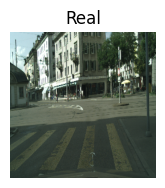

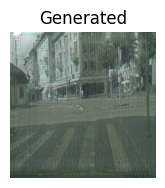

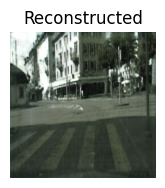

1/1 [==============================] - 0s 23ms/step


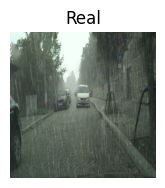

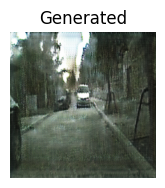

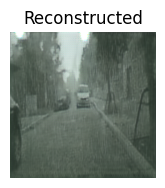

In [ ]:
# load dataset
A_data, B_data = load_real_samples('/content/drive/MyDrive/Colab Notebooks/frame/weather/npzdata/Sunny2Rainy_256.npz')
print('Loaded', A_data.shape, B_data.shape)

# load the models
cust = {'InstanceNormalization': InstanceNormalization}
model_AtoB = load_model('/content/drive/MyDrive/Colab Notebooks/frame/weather/models/g_model_Sunny2Rainy_004160.h5', cust)
model_BtoA = load_model('/content/drive/MyDrive/Colab Notebooks/frame/weather/models/g_model_Rainy2Sunny_004160.h5', cust)

# plot A->B->A
A_real = select_sample(A_data, 1)
B_generated  = model_AtoB.predict(A_real)
A_reconstructed = model_BtoA.predict(B_generated)
show_plot(A_real, B_generated, A_reconstructed)

# plot B->A->B
B_real = select_sample(B_data, 1)
A_generated  = model_BtoA.predict(B_real)
B_reconstructed = model_AtoB.predict(A_generated)
show_plot(B_real, A_generated, B_reconstructed)

In [ ]:
# load an image to the preferred size
def load_image(filename, size=(256,256)):
 # load and resize the image
 pixels = load_img(filename, target_size=size)
 # convert to numpy array
 pixels = img_to_array(pixels)
 # transform in a sample
 pixels = expand_dims(pixels, 0)
 # scale from [0,255] to [-1,1]
 pixels = (pixels - 127.5) / 127.5
 return pixels

1/1 [==============================] - 1s 772ms/step


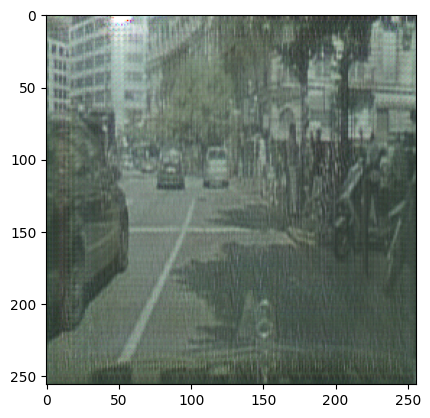

In [ ]:
# load the image
image_src = load_image('/content/drive/MyDrive/Colab Notebooks/dataset/images/Image2.png')
# load the model
cust = {'InstanceNormalization': InstanceNormalization}
model_AtoB = load_model('/content/drive/MyDrive/Colab Notebooks/frame/weather/models/g_model_Sunny2Rainy_004160.h5', cust)
# translate image
image_tar = model_AtoB.predict(image_src)
# scale from [-1,1] to [0,1]
image_tar = (image_tar + 1) / 2.0
# plot the translated image
pyplot.imshow(image_tar[0])
pyplot.show()

1/1 [==============================] - 0s 22ms/step
Sunny to Rainy


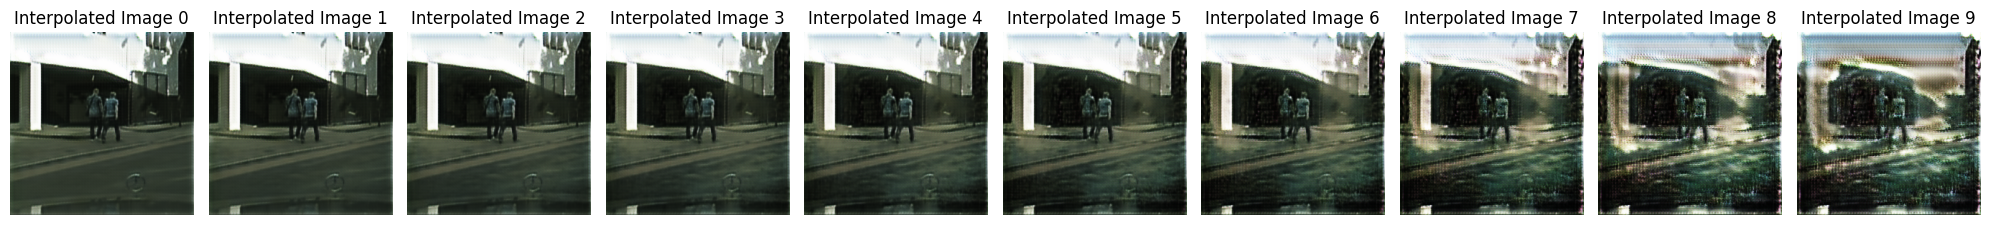

Rainy to Sunny


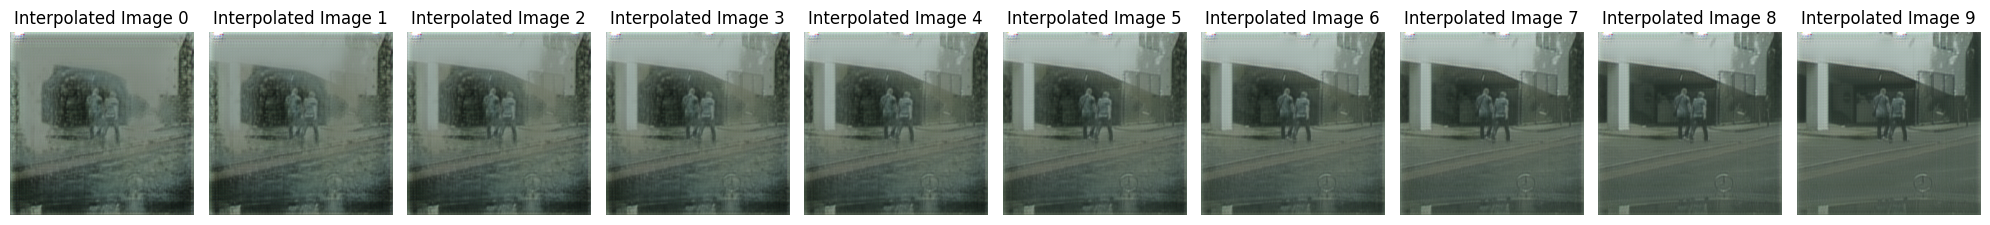

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
# import tensorflow_addons as tfa
import cv2

# Load the Keras model
cust1 = {'InstanceNormalization': InstanceNormalization}
model1 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/frame/weather/models/g_model_Sunny2Rainy_004160.h5', cust1)

# Load the Keras model
cust2 = {'InstanceNormalization': InstanceNormalization}
model2 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/frame/weather/models/g_model_Rainy2Sunny_004160.h5', cust2)

# Set interpolation parameters
num_interpolations = 10  # Number of interpolations between input images
alpha_values = np.linspace(0, 1, num_interpolations)

# Load and preprocess input images
image_A = cv2.imread('/content/drive/MyDrive/Colab Notebooks/frame/weather/images/Image2.png')
image_A = cv2.cvtColor(image_A, cv2.COLOR_BGR2RGB) / 255.0
image_A = cv2.resize(image_A, (256, 256))  # Resize to match the expected input shape
input_A = np.expand_dims(image_A, axis=0)

image_B = cv2.imread('/content/drive/MyDrive/Colab Notebooks/frame/weather/images/Image1.png')
image_B = cv2.cvtColor(image_B, cv2.COLOR_BGR2RGB) / 255.0
image_B = cv2.resize(image_B, (256, 256))  # Resize to match the expected input shape
input_B = np.expand_dims(image_B, axis=0)

# Generate interpolated images
interpolated_imagesAtoB = []
interpolated_imagesBtoA = []
for alpha in alpha_values:
    # Interpolate in both directions (A to B and B to A)
    interpolated_A = alpha * input_A + (1 - alpha) * input_B
    interpolated_B = alpha * input_B + (1 - alpha) * input_A

    # Generate fake images using the model
    fake_B = model1.predict(interpolated_A)
    fake_A = model2.predict(interpolated_B)

    # Denormalize fake images
    fake_B = (fake_B + 1) / 2.0
    fake_A = (fake_A + 1) / 2.0

    # Append interpolated images to the list
    interpolated_imagesAtoB.append(fake_A)
    interpolated_imagesBtoA.append(fake_B)

# # Save interpolated images
# for i, interpolated_image in enumerate(interpolated_images):
#     output_image = interpolated_image.squeeze()
#     output_image = (output_image * 255.0).astype(np.uint8)
#     output_image = cv2.cvtColor(output_image, cv2.COLOR_RGB2BGR)
#     cv2.imwrite(f'interpolated_image_{i}.jpg', output_image)


# Iterate over interpolated images
# for i, interpolated_image in enumerate(interpolated_images):
#     output_image = interpolated_image.squeeze()
#     output_image = (output_image * 255.0).astype(np.uint8)

#     # Display the image
#     plt.figure()
#     plt.imshow(output_image)
#     plt.axis('off')
#     plt.title(f'Interpolated Image {i}')
#     plt.show()


print("Sunny to Rainy")
# Create a figure with a single row
fig, ax = plt.subplots(1, num_interpolations, figsize=(20, 6))

# Iterate over interpolated images from A to B
for i in range(num_interpolations):
    # Get the interpolated image from A to B
    interpolated_image = interpolated_imagesAtoB[i]
    output_image = interpolated_image.squeeze()
    output_image = (output_image * 255.0).astype(np.uint8)

    # Display the image in the corresponding subplot
    ax[i].imshow(output_image)
    ax[i].axis('off')
    ax[i].set_title(f'Interpolated Image {i}')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


print("Rainy to Sunny")
# Create a figure with a single row
fig, ax = plt.subplots(1, num_interpolations, figsize=(20, 6))

# Iterate over interpolated images from A to B
for i in range(num_interpolations):
    # Get the interpolated image from A to B
    interpolated_image = interpolated_imagesBtoA[i]
    output_image = interpolated_image.squeeze()
    output_image = (output_image * 255.0).astype(np.uint8)

    # Display the image in the corresponding subplot
    ax[i].imshow(output_image)
    ax[i].axis('off')
    ax[i].set_title(f'Interpolated Image {i}')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()
